## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these.

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Loading our dataset and checking it
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#Checking the number of rows
print("The number of rows is {}".format(df.shape[0]))

The number of rows is 294478


c. The number of unique users in the dataset.

In [4]:
#Checking the number of unique users
print("The number of unique users is {}".format(df['user_id'].nunique()))

The number of unique users is 290584


d. The proportion of users converted.

In [5]:
#Checking the proportion of users converted
print("The proportion of users converted is {}".format(df.converted.mean()))

The proportion of users converted is 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#Counting how many times new_page and treatment do not match
df.query('group == "treatment" & landing_page == "old_page"').count()[0] + df.query('group == "control" & landing_page == "new_page"').count()[0]

3893

In [7]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].count()[0]

3893

f. Do any of the rows have missing values?

In [8]:
#Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


None of the rows have missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#Cleaning our dataset with possible miss errors
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#Counting the number of unique users in our new dataset
print("The number of unique users is {}".format(df2['user_id'].nunique()))

The number of unique users is 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#Getting the duplicated user in our dataset
df2[df2.duplicated(['user_id'])]['user_id'].sum()

773192

c. What is the row information for the repeat **user_id**? 

In [13]:
#Getting the duplicated user information in our dataset
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#Removing the duplicated user based on user_id column
df2 = df2.drop_duplicates(subset='user_id')

In [15]:
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
p_control_group = df2[df2['group'] == 'control'].converted.mean()
p_control_group

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
p_treatment_group = df2[df2['group'] == 'treatment'].converted.mean()
p_treatment_group

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [20]:
actual_diff = p_treatment_group - p_control_group
actual_diff

-0.0015782389853555567

### Based on the answers above, there is no sufficient evidence to conclude that the new treatment page leads to more conversions because the probability of conversion in the new page is actually lower than in the old page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} - p_{new} => 0 $$
$$H_1: p_{old} - p_{new} < 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
#Using pnew based on the converted rate in ab_data.csv
pnew = df2.converted.mean()
pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
#Using pold based on the converted rate in ab_data.csv
pold = df2.converted.mean()
pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
#Getting nnew based on the sample size in ab_data.csv
nnew = df2[df2['group'] == 'treatment'].shape[0]
nnew

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
#Getting nold based on the sample size in ab_data.csv
nold = df2[df2['group'] == 'control'].shape[0]
nold

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
#Simulating nnew transactions with a pnew conversion rate
new_page_converted = np.random.binomial (1, pnew, nnew)
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#Simulating nnew transactions with a pold conversion rate
old_page_converted = np.random.binomial (1, pold, nold)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
new_page_converted.mean() - old_page_converted.mean()

-0.00067682042128887343

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
#Bootstrapping in order to get a sampling distribution
p_diffs = []
for n in range(10000):
    new_page_converted = np.random.binomial (1, pnew, nnew)
    old_page_converted = np.random.binomial (1, pold, nold)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

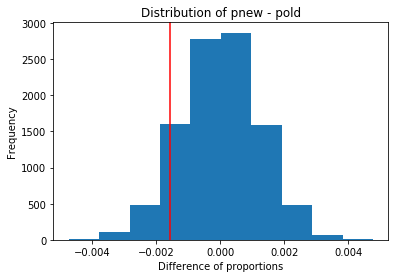

In [29]:
#Plotting our sample distribution
plt.hist(p_diffs)
plt.xlabel ('Difference of proportions')
plt.ylabel ('Frequency')
plt.title('Distribution of pnew - pold')
plt.axvline(actual_diff, color = 'red');

Here we have the sampling distribution of pnew - pold under the null, where we consider pnew = pold. We used bootstrapping to check how this statistic can change from one sample to another.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
#Getting our p-value
(p_diffs > actual_diff).mean()

0.90180000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### The computed value in j. is called p-value, which is the probability of getting test results equal or more extreme than the observed in the sample, given that the null hypothesis is true. As said in the course videos, p-value is the probability of observing our statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

### In a nutshell, very small p-values indicates that the probability of getting test results equal to the observed in the sample is unlikely, leading to rejecting the null hypothesis.

### In our case, since the p-value is around 0.9, this give us evidence that the null hypothesis is probably true, so we fail to reject it. Basically the new page conversion is no better than the old page conversion.

### Therefore the company e-commerce has no reason to change it's web page.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2[df2['group'] == 'control'].converted.sum()
convert_new = df2[df2['group'] == 'treatment'].converted.sum()
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [32]:
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
#Performing a two-sample proportion hypothesis testing using statsmodels:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### Since the p-value here is very high (0.905) and the Z-score is small (-1.311), this means we fail to reject the null hipothesis and the convertion rate of the new page is no better than the conversion rate of the old page. This result agree with the findings in part j and k, it reinforces that the e-commerce should not change the webpage. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### Since we have two possible outcomes, one sucessful and one failure, we should perform a logistic regression to predict the probability of a conversion happening based on which page the user is viewing. Therefore, if the ab_page has no statistical significance in predicting it, we fail to reject the null hipothesis, we can assure that p_new is equal to p_old and there is no reason for the e-commerce company to change the webpage.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
#Adding an intercept column
df2['intercept'] = 1
#Adding an ab_page column by getting dummies variables from the group column
df2['ab_page'] = pd.get_dummies(df2['group'], drop_first = True)


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
#Performing a logistic regression
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
#Checking the results from our logistic regression
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-25 22:44 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

### The p-value associated with ab_page is 0.1899, so based on a 95% confidence and an alpha equals to 0.05, the ab_page column has no statistical significance. It differs from the value found in Part II because the null hipothesis in logistic regression is different from the null hipothesis from part II.

### Back in part II, as seen before, the null hipothesis was: 
$$H_0: p_{old} - p_{new} => 0 $$
$$H_1: p_{old} - p_{new} < 0 $$

### Here the null hipothesis is:
$$H_0: p_{old} - p_{new} = 0 $$
$$H_1: p_{old} - p_{new} != 0 $$

### Since ab_page has no statistical significance, we fail to reject the null hipothesis and assume p_new is equal to p_old.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

###  We should consider adding other factors into the regression model because they might influence the conversion rate as well. For instance, we could add variables related to gender, age, education level, time of the year, time of the day and many others. Therefore, not considering factors like these is a limitation that should be kept in mind while making the final decision. Besides that, by not adding other variables we can sometimes be led to trends that are not really true, trends that dissapear or even change directions when we group other groups of data (Simpson's Paradox).

### When adding other related predictor variables, we should be careful with their correlation as our model can be affected by multicollinearity and lead to mistaken results. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
#loading the country dataset in order to join it to our dataframe. 
df3 = pd.read_csv('countries.csv')

#Joining our country dataset in df2 based on user_id column:
df2 = df2.join(df3.set_index('user_id'), on = 'user_id')

In [38]:
#Getting dummies variables from our country coulmn:
df2 = df2.join(pd.get_dummies(df2['country']))

In [39]:
#Performing a logistic regression
logit2 = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK']])
results2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [40]:
#Checking the results from our logistic regression
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-25 22:44 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

### As we can see from the summary above, the p-value for the CA and UK variables are both bigger than 0.05 and no statistical significance. Therefore, the country users live in has no impact in predicting a convertion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
#Performing a logistic regression
logit3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
results3 = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [42]:
#Checking the results from our logistic regression
results3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-25 22:44 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

### As before, all the p-values found in our regression are bigger than 0.05 and have no statistical significance.

## Conclusion

### As seen in both bootstrapping and regression techniques, none of the p-values found were smaller than 0.05 and we failed to reject the null hipothesis twice. Therefore the new page does not have a conversion rate better than the old one and the e-commerce company has no reason to change for it. As a matter of fact, the conversion rate found in the new page is slightly smaller than the one in the previous page.

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0